# **Лабораторная работа №5 по вычислительной математикe.**

## Работу выполнил: Шурыгин Антон, Б01 - 909.

### **VIII. 11.3**

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#### Исследуйте поведение фазовых траекторий для системы ОДУ

$$
 x' = y \\
 y' = x^{2} - 1
$$

вблизи особых точек (1, 0) и (-1, 0) с помощью двух методов Рунге-Кутты(первого и четвертого порядка аппроксимации). Значение $x(0), y(0)$ варьируйте самостоятельно.

In [161]:
x = sp.Symbol('x')
y = sp.Symbol('y')

diff_eqs = {"f1" : y, 
            "f2" : x ** 2 - 1}

def f(time, u_k):
    return np.array([diff_eqs["f1"].subs({x : u_k[0], y : u_k[1]}), 
                     diff_eqs["f2"].subs({x : u_k[0], y : u_k[1]})])

time_start = 0
time_end = 5

fig_size=[16, 8]
x_lim = [-0.5, 0.5]
y_lim = [-0.5, 0.5]

x_label = "x"
y_label = "y"

### **Методы Рунге-Кутты** 

#### Для СДУ

$$
\frac{d\vec{u}}{dt} = \vec{f}(t, \vec{u})
$$

c задачей Коши:

$$
\overrightarrow{u(0)} = \overrightarrow{u_0}
$$

#### Рассмотрим метод Рунге-Кутты первого порядка аппроксимации

$$ \frac{\Delta\overrightarrow{u_n}}{\tau} = \overrightarrow{f}(t_n, \overrightarrow{u_n})  \:\: \Rightarrow \:\: \overrightarrow{u_{n + 1}} = \overrightarrow{u_n} + \tau \overrightarrow{f}(t_n, \overrightarrow{u_n}) $$

In [157]:
def RungeKutte1(u_0, u_c, iters):

    t_arr, tau = np.linspace(time_start, time_end, iters, retstep=True)

    phase_trajct = []
    u_n = np.array(u_0)

    for t_it in t_arr:

        u_n_1 = u_n + tau*f(t_it, u_n)
        phase_trajct.append(u_n_1)
        u_n = u_n_1

    plt.figure(figsize=fig_size)

    phase_trajct = np.transpose(phase_trajct)

    plt.plot(u_c[0], u_c[1], 'o')
    plt.plot(phase_trajct[0], phase_trajct[1], color='r')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


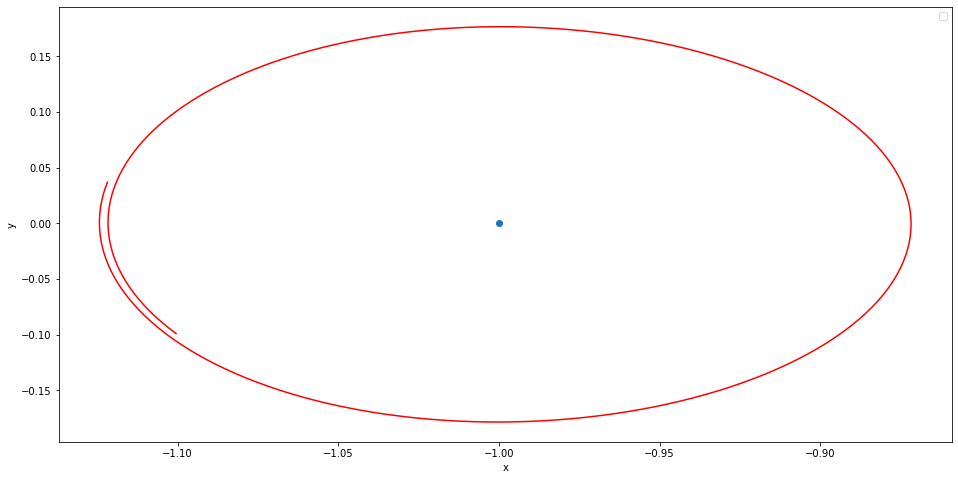

In [158]:
RungeKutte1(u_0=[-1.1, -0.1], u_c=[-1, 0], iters=1000)


#### Рассмотрим метод Рунге-Кутты четвертого порядка аппроксимации

$$ \frac{\Delta\overrightarrow{u_n}}{\tau} = \overrightarrow{f}(t_n, \overrightarrow{u_n})  \:\: \Rightarrow \:\: \overrightarrow{u_{n + 1}} = \overrightarrow{u_n} + \frac{k1 + 2k_2 + 2k_3 + k_4}{6} $$

где 

$$

k_1 = \tau \overrightarrow{f}(t_n, \overrightarrow{u_n})
\\
k_2 = \tau \overrightarrow{f}(t_n + \frac{\tau}{2}, \overrightarrow{u_n} + \frac{k_1}{2}) \\
k_3 = \tau \overrightarrow{f}(t_n + \frac{\tau}{2}, \overrightarrow{u_n} + \frac{k_2}{2})
\\
k_4 = \tau \overrightarrow{f}(t_n + \tau, \overrightarrow{u_n} + k_3)
$$

In [160]:
def RungeKutte4(u_0, u_c, iters):

    t_arr, tau = np.linspace(time_start, time_end, iters, retstep=True)

    phase_trajct = []
    u_n = np.array(u_0)

    for t_it in t_arr:
        
        k1 = tau * f(t_it, u_n)
        k2 = tau * f(t_it + tau/2, u_n + k1/2)
        k3 = tau * f(t_it + tau/2, u_n + k2/2)
        k4 = tau * f(t_it, u_n + k3)

        u_n_1 = u_n + (k1 + 2*k2 + 2*k3 + k4) / 6
        phase_trajct.append(u_n_1)
        u_n = u_n_1

    plt.figure(figsize=fig_size)

    phase_trajct = np.transpose(phase_trajct)

    plt.plot(u_c[0], u_c[1], 'o')
    plt.plot(phase_trajct[0], phase_trajct[1], color='r')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


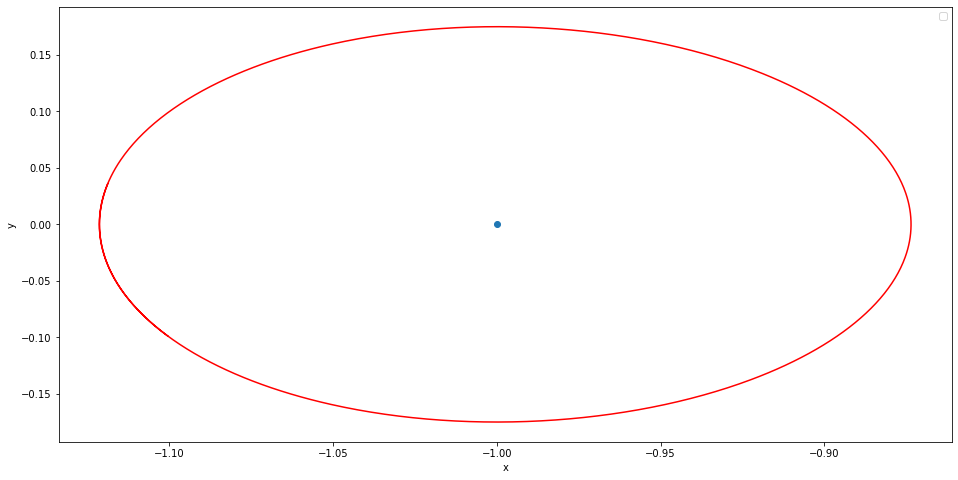

In [162]:
RungeKutte4(u_0=[-1.1, -0.1], u_c=[-1, 0], iters=1000)